In [1]:
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt

In [2]:
def code_runtime_analysis(N=1000, program=1):
    """
    N = number of iterations in the for-loops
    program = 1 to 6 for 6 programs specified in Problem 2.7 of textbook
    """
    if program == 1:
        sum = 0.0
        for i in range(N):
            sum += 1.0
    elif program == 2:
        sum = 0.0
        for i in range(N):
            for j in range(N):
                sum += 1.0
    elif program == 3:
        sum = 0.0
        for i in range(N):
            for j in range(N*N):
                sum += 1.0
    elif program == 4:
        sum = 0.0
        for i in range(N):
            for j in range(i):
                sum += 1.0
    elif program == 5:
        sum = 0.0
        for i in range(N):
            for j in range(i*i):
                for k in range(j):
                    sum += 1.0
    elif program == 6:
        sum = 0.0
        for i in range(N):
            for j in range(i*i):
                if j % i == 0:
                    for k in range(j):
                        sum += 1.0
    return 0

In [3]:
program_id_list = []
N_list = []
runtime_list = []

# For each program, we run the for-loops for various N-values
for program in range(1,7):
    print(f"analyzing Program #{program}:")
    # Since Program #1 is known to have linear order of operations, we use large N values to offset any overhead
    if program == 1:
        N_vectors = list(range(1000, 10001, 2000))
    # For Program #2, #3, ..., #6, order of operations are no longer linear; thus using large N values can cause long run time
    # so we will just use smaller N
    else:
        N_vectors = list(range(100, 201, 20))
    for N in N_vectors:
        print(f"Using N={N}")
        # time the code
        start_time = time.time()
        code_runtime_analysis(N=N, program=program)
        end_time   = time.time()
        run_time = (end_time-start_time)*1000.0
        print("Run-time: ", run_time, "mili-seconds")
        print(" ")

        program_id_list.append(program)
        N_list.append(N)
        runtime_list.append(run_time)


analyzing Program #1:
Using N=1000
Run-time:  0.025033950805664062 mili-seconds
 
Using N=3000
Run-time:  0.08606910705566406 mili-seconds
 
Using N=5000
Run-time:  0.1270771026611328 mili-seconds
 
Using N=7000
Run-time:  0.16689300537109375 mili-seconds
 
Using N=9000
Run-time:  0.1990795135498047 mili-seconds
 
analyzing Program #2:
Using N=100
Run-time:  0.18596649169921875 mili-seconds
 
Using N=120
Run-time:  0.26702880859375 mili-seconds
 
Using N=140
Run-time:  0.3619194030761719 mili-seconds
 
Using N=160
Run-time:  0.4749298095703125 mili-seconds
 
Using N=180
Run-time:  0.5917549133300781 mili-seconds
 
Using N=200
Run-time:  0.7281303405761719 mili-seconds
 
analyzing Program #3:
Using N=100
Run-time:  24.380207061767578 mili-seconds
 
Using N=120
Run-time:  43.782949447631836 mili-seconds
 
Using N=140
Run-time:  69.60391998291016 mili-seconds
 
Using N=160
Run-time:  104.03323173522949 mili-seconds
 
Using N=180
Run-time:  146.5919017791748 mili-seconds
 
Using N=200
Run-

In [4]:
run_time

4905.597925186157

In [5]:
df = pd.DataFrame({
    'program_id': program_id_list,
    'N': N_list,
    'run_time': runtime_list
})
df.head()

,program_id,N,run_time
0,1,1000,0.025034
1,1,3000,0.086069
2,1,5000,0.127077
3,1,7000,0.166893
4,1,9000,0.199080


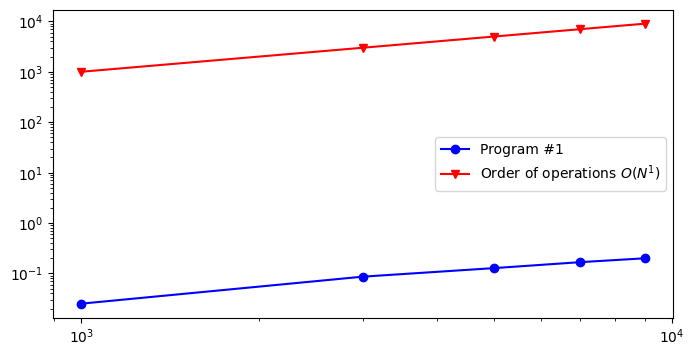

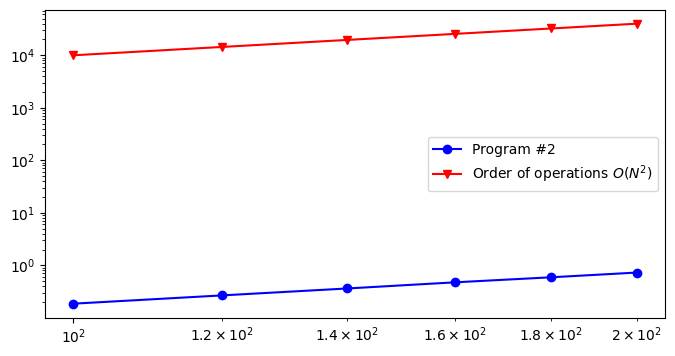

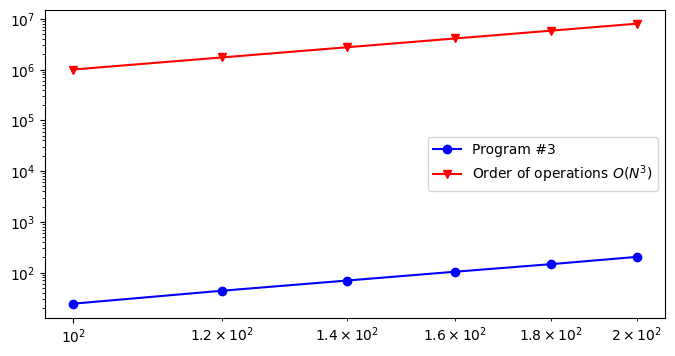

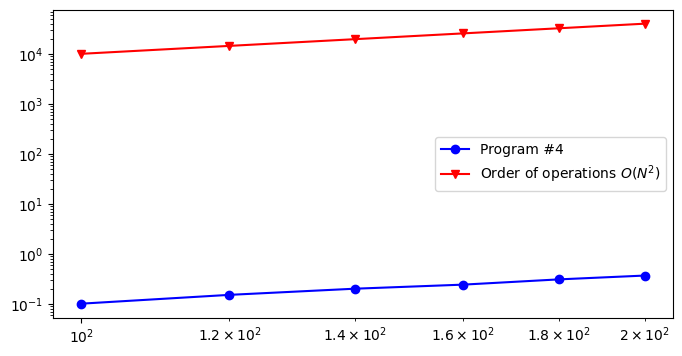

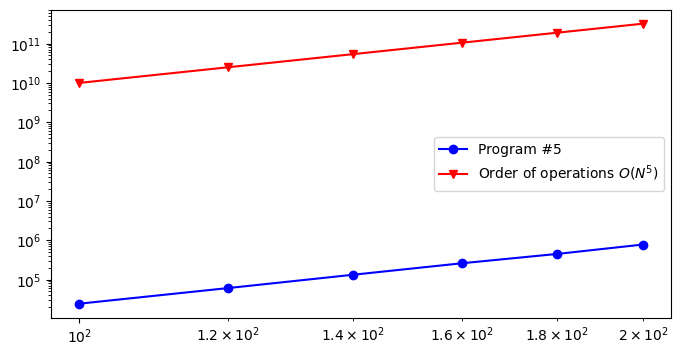

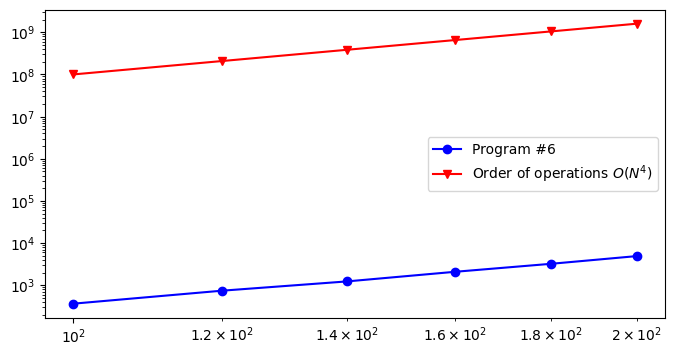

In [6]:
# Theoretical orders of operations: O(N^{orders}) for Programs #1 -> #6
orders = [1,2,3,2,5,4] 

# Plotting orders of operations for each program vs. theoretical orders as loglog plot
idx = 0
for p in range(1,7):
    df1 = df[df['program_id']==p]
    fig, ax = plt.subplots(1,1,figsize=(8,4))
    ax.loglog( df1['N'].values, df1['run_time'].values, c='blue', marker='o', label=f'Program #{p}' )
    ax.loglog( df1['N'].values, pow(df1['N'].values, orders[idx]), c='red', marker='v', label=f'Order of operations $O(N^{orders[idx]})$' )
    ax.legend()
    plt.show()
    idx += 1